# Lecture 1 - Word vectors

## Human language and word meaning

In NLP, We want to represent the meaning of words. Words have a lot of rich meaning. Question then becomes: *what is meaning?*

### How do we have usable meaning in a computer?
Common solution is using *WordNet*, a thesaurus containing lists of **synonym sets** and **hypernyms** ("is a" relationships).

In [1]:
from nltk.corpus import wordnet as wn

In [ ]:
panda = wn.synset("panda.n.01")
hyper = lambda s: s.hypernyms()
list(panda.clos)

In [4]:
poses = { "n":"noun", "v":"verb", "s":"adj (s)", "a":"adj", "r":"adv"}
for synset in wn.synsets("good"):
    print("{}: {}".format(poses[synset.pos()],
                          ",".join([l.name() for l in synset.lemmas()]
                                   )
                          )
          )

noun: good
noun: good,goodness
noun: good,goodness
noun: commodity,trade_good,good
adj: good
adj (s): full,good
adj: good
adj (s): estimable,good,honorable,respectable
adj (s): beneficial,good
adj (s): good
adj (s): good,just,upright
adj (s): adept,expert,good,practiced,proficient,skillful,skilful
adj (s): good
adj (s): dear,good,near
adj (s): dependable,good,safe,secure
adj (s): good,right,ripe
adj (s): good,well
adj (s): effective,good,in_effect,in_force
adj (s): good
adj (s): good,serious
adj (s): good,sound
adj (s): good,salutary
adj (s): good,honest
adj (s): good,undecomposed,unspoiled,unspoilt
adj (s): good
adv: well,good
adv: thoroughly,soundly,good


### Problems with resources like WordNet

- Missing nuance, missing new meanings of words, subjective, requires human labor to create and adapt, can't compute word similarity

### Representing words as discrete symbols

In traditional NLP, we regard words as discrete symbols. Basically, presenting words in one-hot vectors. Problem is the size of the vectors, in a regular English dictionary there are about 250,000 words and easy ot get to a million with scientific, etc. words. So basically there are an infinite number of words in languages, in English by using derivational morphology you can create new words.

There'a much bigger problem then that:lack of similarity relationship. Vectors are orthgonal. Google's solution in around 2005 was using Similarity matrices, that is a dictionary with similiarities like *hotel-motel*.

### Representing words by their context

It's called *distributional semantics*.

"You shall know a word by the company it keeps" -J.R. Firth, 1957

Using words that exist around one word in different sentences to describe it. It does a great job at capturing meaning.

### Word vectors

Somestimes it's called *word embeddings*, or *word representations*. It's a *distributed* representation.

## Word2vec: Overview

**Word2vec** (Mikolov et al. 2013) is a framework for learning word vectors.

Idea:
- We have a large corpus of text
- Every word in a fixed vocabulary is represented by a **vector**
- Go through each position *t* in the text, which has a center word *c* and context ("outside") words *o*
- Use the **similarity of the word vectors** for *c* and *o* to **calculate the probability** of *o* given *c* (or vice versa)
- **Keep adjusting the word vectors** to maximize this probability.

### Word2vec: objective function

#### Likelihood

Basically, product of conditional probabilities over the whole corpus of words, corpus just becomes a long list of words.

Parameter: we're representing a word by a vector in the vector space and that representation is it's meaning and we're going to use that to predict what other words occur.


#### Objective function / Loss function

Basically, just the negative of the log of the likelihood. Log will allow us to sum the log of the probability.

#### How to calculate the probability of a word at *t+j* given word at *t*?

We will use *two vectors* per word *w*:
- $v_w$ when *w* is a center word
- $u_w$ when *w* is a context word

We write $P(u_{problems} \mid v_{into})$ short for $P(problems \mid into;u_{problems}, v_{into}, \theta)$

#### Word2vec: prediction function

Dot product is our similarity measure.

Exponentiated dot product of two vectors: center and outside. Larger dot product = latger probability. Exponentiation makes anything positive.

Then normalize over entire vocabulary by dividing the exponention by the sum of all probabilities.

Softmax always turn any numbers into a probability distribution. 

#### Training a model by optimizing parameters

We have a loss function with a probability model on the inside that we can build and so what we want to be able to do is then move our vector representations of words around so that they are good at predicting what words occur in the context of other words. That is, optimization.

To train a model, we adjust parameters to minimize a loss, e.g.for a simple convex function over two parameters, contour lines show levels of objective function.

#### Compute all vector gradients

We want to make a very big vector in a very high-dimensional vector space of all the parameters of our model and the only parameters that his model has is literally the vector space representations of words. So if there are a 100-dimensional word representations, there are 100 parameters for "aardvark" in context, 100 parameters for the word "art" in **context**, etc. and then 100 parameters for the word "aardvark" as a **center word**, etc.

That gives a big vector of parameters to optimize.

- Recall: $\theta$ represents **all** model parameters in one long vector
- In our case, with *d*-dimensional vectors and *V*-many words
- Remember: every word has two vectors
- We optimize these parameters by walking down the gradient

#### Concrete example

The way we calculate the $u$ and $v$ vectors is we're literally going to start with a random vector for each word and then iteratively going to change those vectors a little bit as we learn. And the way we're going to work out how we change them is the following.

We're going to say, "I want to do optimization. Okay, we have the current vectors for each word. Let me do some calculus to work out how I could change the word vectors to mean that the word vectors would calculate a higher probability for the words that actually occur in the context of this center word." And we will do that again and again and again. 

Minimize $J(\theta)$ by changing the parameters $\theta$, where $\theta$ are the the vectors $u$ and $v$.

What I want to achieve for my distributional notion of meaning is, I have a meaningful word, a vector and that knows what words occur in the context of a word-itself. And knowing what words occur in its context means, it can accurately give a high probability estimate to those words that occur in the context and it will give low probability to words that don't typically occur in the context. So, if the word is "bank", I'm hoping that words like "branch", "open", "withdrawal" will be given high probability because they tend to occur with the word "bank".

Obviously, we're not going to be able to do this super-well or we're just not gonna be able to say "Oh, the word in the context is going to be is this word with probability .97" because we're using one simple probability distribution to predict all words in our context. So, it's going to be a very loose model.

**Conclusion, after taking partial derivates:**

The partial derivative of the logarithm of $\Pr(o \mid c)$ is our slope in the multi-dimensional space and how we're getting that slope is:

- we're taking the observed representation $u_o$ of the context word and
- we're subtracting from that what our model thinks what the context should look like.

What does the model think that the context should like?
The sum part is formal in expectation. Basically we calculate a weighted average by multiplying the models of the representations of word with the probability of the word in the current model.

So, we are calculating the difference between the actual context word and the expected context word, that difference turns out to exactly give the slope as to which direction we should be walking, changing the words representation in order to improve our model's ability to predict.

#### Gensim word vector visualization of various word vectors

In [11]:
import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

For looking at word vectors, we'll use Gensim. We also use it in hw1 for word vectors. Gensim isn't really a deep learning package. It's a package for word and text similarity modeling, which started with LDA-style topic models and grew into SVD and neural word representations. But it is efficient and scalable, and quite widely used.

Our homegrown Stanford offering is GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

(I use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

In [4]:
root = "/Volumes/750GB-HDD/root/"
data_folder = "Question-Answering/pyData/"
glove_file = datapath("C:/Users/jun090919/gensim-data/glove.6B.100d.txt")
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [5]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [6]:
model.most_similar("batman")

[('superman', 0.8058773279190063),
 ('superhero', 0.6820073127746582),
 ('sequel', 0.6592288017272949),
 ('catwoman', 0.654157817363739),
 ('joker', 0.6362104415893555),
 ('comics', 0.636048436164856),
 ('marvel', 0.6221269369125366),
 ('spider-man', 0.6080650687217712),
 ('villain', 0.6072645783424377),
 ('gotham', 0.5963695645332336)]

In [33]:
# Most dissimilar
model.most_similar(negative="banana")

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720890045166),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.6949152946472168),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653395652771)]

In [34]:
result = model.most_similar(positive=["woman", "king"], negative=["man"])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [35]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [57]:
analogy("france", "paris", "united")

'washington'

In [37]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/Volumes/750GB-HDD/root/Question-Answering/lib/python3.6/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [12]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

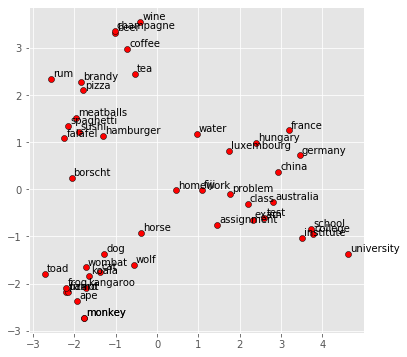

In [13]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

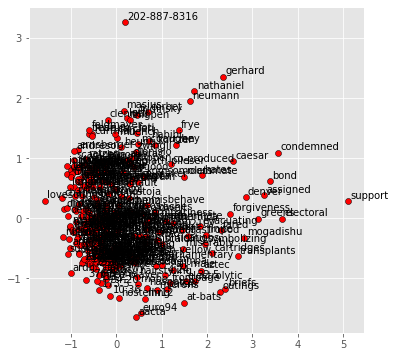

In [14]:
display_pca_scatterplot(model, sample=300)

# Lecture 2 - Word Vectors and Word Senses

## Word vectors and word2vec (ctd.)

**Main idea of word2vec:**

1. Iterate through each word of the whole corpus
2. Predict surrounding words using word vectors

U: outside matrix
V: center matrix

We want a model that gives a reasonably high probability estimate to *all* words that occur in the context (fairly often).

2D pictures can be exceedingly misleading because we don't get other points that are close. A word can be close to other words in different directions.

## Optimization: Gradient Descent

- We have a cost function $J(\theta)$ we want to maximize
- **Gradient Descent** is an algorithm to minimize $J(\theta)$
- Idea: for current value of $\theta$, calculate gradient of $J(\theta)$, then take *small step in the direction of negative gradient*. Repeat.

- Update equation (in matrix notation):

$$ \theta^{new} = \theta^{old} - \alpha \nabla_{\theta}J(\theta)$$

- $\alpha$ = *step size* or *learning rate*

- Update equation (for a single parameter):

$$ \theta^{new}_j = \theta^{old}_j - \alpha \frac{\partial}{\partial \theta^{old}_j}J(\theta) $$

- Algorithm:

In [ ]:
while True:
    theta_grad = evaluate_gradient(J, corpus, theta)
    theta = theta - alpha * theta_grad

We don't really do this because it would take too much time.  Instead we use **Stochastic Gradient Descent**.
### Stochastic Gradient Descent

We sample our window and for just this window we calculate an estimate of the gradient and use it as a parameter update. This is a very noisy estimte of the gradient.
Algorithm:

In [ ]:
while True:
    window = sample_window(corpus)
    theta_grad = evaluate_gradient(J, window, theta)
    theta = theta - alpha * theta_grad

In practice, we sample 32 or 64 windows (mini-batch). We parallelize using GPU for faster computation and it is important that the size of the mini-batch is a power of two.

### Stochastic gradients with word vectors

- We might only update the word vector that actually appear

- Solution: either you need sparse matrix update operations to only update certain rows of full embedding matrics *U* and *V*, or you need to keep around a hash for word vectors

- If you have millions of word vectors and do distributed computing, it is important to not have to send gigantic updates around

### More details
Why to vectors? --> Easier optimization. Average both at the end.

Two model variants:

1. Skip-grams (SG): Predict context
2. CBOW: Predict center word

Adiditional efficiency in training:

1. Negative sampling (so far, focus on naive softmax)

### The skip-gram with negative sampling (HW2)

Randomly sample a bunch of other words and say they weren't the ones that we've actually seen.